In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

sample_data/


In [4]:
df = pd.read_csv('C://Users//saish//Desktop//MEDIUM//lr//data.csv', index_col=False)
# df = pd.read_csv('advertising.csv')

ImportError: ignored

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:

df.info()
#df.ndim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Visualization

To visualize distribution of data

Regression line is drawn over the points 

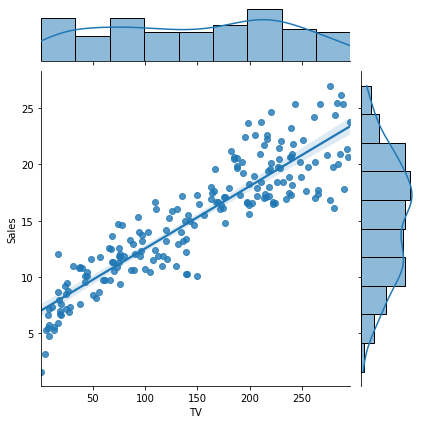

In [ ]:
sns.jointplot(x=df['TV'], y=df['Sales'], data=df, kind='reg')

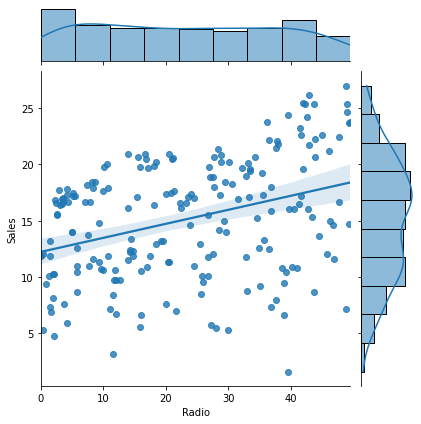

In [ ]:
sns.jointplot(x=df['Radio'], y=df['Sales'], data=df, kind='reg')

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#X= df[['TV','Radio','Newspaper']]
X= df[['TV']]

Y=df[['Sales']]

In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['TV'].to_numpy()
x_test=x_test['TV'].to_numpy()
y_train=y_train['Sales'].to_numpy()
y_test=y_test['Sales'].to_numpy()



x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (160, 1)
Test - Predictors shape (40, 1)
Train - Target shape (160, 1)
Test - Target shape (40, 1)


In [ ]:
a=[1,3,4,5,8,9]
a=np.array(a)
#a.to_numpy()
b=a.reshape(2,3)
b

array([[1, 3, 4],
       [5, 8, 9]])

In [ ]:
x_train.ndim

2

In [ ]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Splitting data into test and train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['TV'], df['Sales'], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

KeyError: ignored

# Linear Regression using Scikit

*   List item
*   List item



This is the linear regression model implemented using scikit library. 

In [ ]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = cls.predict(x_test)

In [ ]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[0.05548294]]


In [ ]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [7.00710843]


In [ ]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 6.101072906773963


In [ ]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.802561303423698


Text(0.5, 1.0, 'Linear Regression')

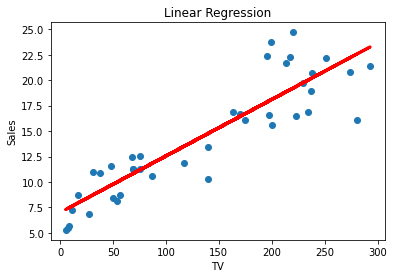

In [ ]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression')

In [ ]:
len(x_test)

40

Text(0, 0.5, 'Residual')

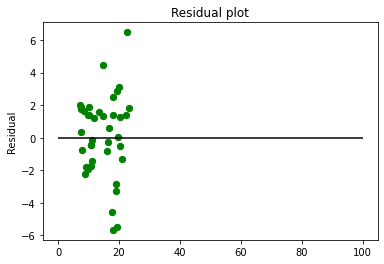

In [ ]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

points are scattered around the line zero and there is no pattern that can be observed. This indicates that there no relation between predictors or time dependant data that is missed.

# Linear Regression using normal equaltions

1.   List item
2.   List item



In [ ]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [ ]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):

        #pred.append((slope * x_test.iloc[i]['TV']) + intercept)
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [ ]:
x_test.shape

(40, 1)

In [ ]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [ ]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [ ]:
y_test

[array([16.06747317]),
 array([17.84847567]),
 array([23.25806271]),
 array([7.65625887]),
 array([19.23000098]),
 array([11.17387752]),
 array([19.03581067]),
 array([9.78125562]),
 array([19.34651516]),
 array([16.72217191]),
 array([8.75482116]),
 array([10.12524988]),
 array([20.01785878]),
 array([7.30671633]),
 array([14.74697911]),
 array([16.45030549]),
 array([7.41213392]),
 array([17.97053815]),
 array([11.18497411]),
 array([20.17875932]),
 array([19.74044406]),
 array([10.76885203]),
 array([9.1154603]),
 array([20.92777906]),
 array([10.83543156]),
 array([9.97544593]),
 array([18.85271696]),
 array([14.73588252]),
 array([11.84522114]),
 array([7.47316516]),
 array([18.09260063]),
 array([10.84652815]),
 array([18.04266598]),
 array([7.94477018]),
 array([22.58117079]),
 array([20.22314567]),
 array([9.68693462]),
 array([22.19279018]),
 array([13.50970946]),
 array([8.53288939])]

In [ ]:


#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
#pred_df = pd.DataFrame(prediction)
#pred_df.columns=['sales']
#error =  mse_calc(prediction, y_test)
error =  mse_calc(prediction, y_test)

print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [7.00710843]
Slope of the model [0.05548294]
Mean squared error of the model 6.101072906773965
R squared value 0.802561303423698


In [ ]:
len(prediction)
type(prediction)
type(y_test)
y_test.head()

pred_df.head()
y_test.head()
error =  mse_calc(pred_df, y_test)
print('Mean squared error of the model', error)

r2_val = rsq(pred_df, y_test)
print('R squared value', r2_val)

Mean squared error of the model sales    3.166728
dtype: float64
R squared value sales    0.899671
dtype: float64


In [ ]:
#x_test.iloc[1]['TV']
#b=a['TV']
#type(b)
#a
   # error = (np.sum((prediction - y_test)**2))/total_data
np.sum(prediction)

536.2973597951217

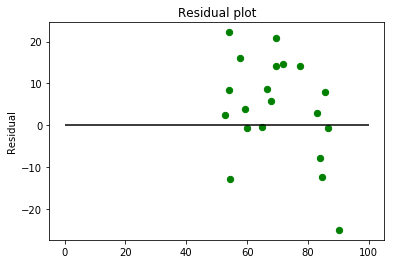

In [ ]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Linear Regression using Gradient Descent

In [ ]:
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [ ]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

In [ ]:
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 50
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

KeyError: ignored

In [ ]:
type(x_test)

pandas.core.frame.DataFrame

In [ ]:
type(x_train)

numpy.ndarray